In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from model import *
from utils import *

In [2]:
!pip install torchsummary
from torchsummary import summary
use_mps = torch.backends.mps.is_available()
device = torch.device("mps:0" if use_mps else "cpu")
model = Net().to(device)
model_summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
              ReLU-2            [-1, 8, 28, 28]               0
       BatchNorm2d-3            [-1, 8, 28, 28]              16
           Dropout-4            [-1, 8, 28, 28]               0
            Conv2d-5            [-1, 4, 30, 30]              36
            Conv2d-6            [-1, 8, 30, 30]             296
              ReLU-7            [-1, 8, 30, 30]               0
       BatchNorm2d-8            [-1, 8, 30, 30]              16
           Dropout-9            [-1, 8, 30, 30]               0
        MaxPool2d-10            [-1, 8, 15, 15]               0
           Conv2d-11           [-1, 16, 15, 15]           1,168
             ReLU-12           [-1, 16, 15, 15]               0
      BatchNorm2d-13           [-1, 16, 15, 15]              32
          Dropout-14           [-1, 16,

/Volumes/External SSD Aakash/ERA Program/S6 - Assignment/model.py:69: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [3]:


torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_mps else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


In [4]:

model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

num_epochs = 15
for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train(model, device, train_loader, optimizer,epoch)
    test(model, device, test_loader)

Epoch 1


Train: Loss=0.0914 Batch_id=468 Accuracy=66.17: 100%|██████████| 469/469 [00:09<00:00, 48.71it/s]


Test set: Average loss: 0.0021, Accuracy: 9226/10000 (92.26%)

Epoch 2


Train: Loss=0.0802 Batch_id=468 Accuracy=95.81: 100%|██████████| 469/469 [00:08<00:00, 53.32it/s]


Test set: Average loss: 0.0006, Accuracy: 9756/10000 (97.56%)

Epoch 3


Train: Loss=0.0530 Batch_id=468 Accuracy=97.20: 100%|██████████| 469/469 [00:08<00:00, 53.46it/s]


Test set: Average loss: 0.0005, Accuracy: 9802/10000 (98.02%)

Epoch 4


Train: Loss=0.0447 Batch_id=468 Accuracy=97.70: 100%|██████████| 469/469 [00:08<00:00, 53.74it/s]


Test set: Average loss: 0.0005, Accuracy: 9819/10000 (98.19%)

Epoch 5


Train: Loss=0.0853 Batch_id=468 Accuracy=97.98: 100%|██████████| 469/469 [00:08<00:00, 53.75it/s]


Test set: Average loss: 0.0004, Accuracy: 9831/10000 (98.31%)

Epoch 6


Train: Loss=0.0238 Batch_id=468 Accuracy=98.24: 100%|██████████| 469/469 [00:08<00:00, 54.20it/s]


Test set: Average loss: 0.0004, Accuracy: 9857/10000 (98.57%)

Epoch 7


Train: Loss=0.0290 Batch_id=468 Accuracy=98.39: 100%|██████████| 469/469 [00:08<00:00, 53.92it/s]


Test set: Average loss: 0.0004, Accuracy: 9848/10000 (98.48%)

Epoch 8


Train: Loss=0.0381 Batch_id=468 Accuracy=98.50: 100%|██████████| 469/469 [00:08<00:00, 53.56it/s]


Test set: Average loss: 0.0003, Accuracy: 9865/10000 (98.65%)

Epoch 9


Train: Loss=0.0221 Batch_id=468 Accuracy=98.63: 100%|██████████| 469/469 [00:08<00:00, 53.95it/s]


Test set: Average loss: 0.0003, Accuracy: 9870/10000 (98.70%)

Epoch 10


Train: Loss=0.0224 Batch_id=468 Accuracy=98.67: 100%|██████████| 469/469 [00:08<00:00, 53.72it/s]


Test set: Average loss: 0.0003, Accuracy: 9904/10000 (99.04%)

Epoch 11


Train: Loss=0.0076 Batch_id=468 Accuracy=98.81: 100%|██████████| 469/469 [00:08<00:00, 53.09it/s]


Test set: Average loss: 0.0002, Accuracy: 9907/10000 (99.07%)

Epoch 12


Train: Loss=0.0511 Batch_id=468 Accuracy=98.86: 100%|██████████| 469/469 [00:08<00:00, 53.49it/s]


Test set: Average loss: 0.0003, Accuracy: 9899/10000 (98.99%)

Epoch 13


Train: Loss=0.0115 Batch_id=468 Accuracy=98.93: 100%|██████████| 469/469 [00:08<00:00, 54.24it/s]


Test set: Average loss: 0.0002, Accuracy: 9903/10000 (99.03%)

Epoch 14


Train: Loss=0.0676 Batch_id=468 Accuracy=98.94: 100%|██████████| 469/469 [00:08<00:00, 53.65it/s]


Test set: Average loss: 0.0002, Accuracy: 9912/10000 (99.12%)

Epoch 15


Train: Loss=0.0086 Batch_id=468 Accuracy=98.97: 100%|██████████| 469/469 [00:08<00:00, 53.92it/s]


Test set: Average loss: 0.0002, Accuracy: 9903/10000 (99.03%)



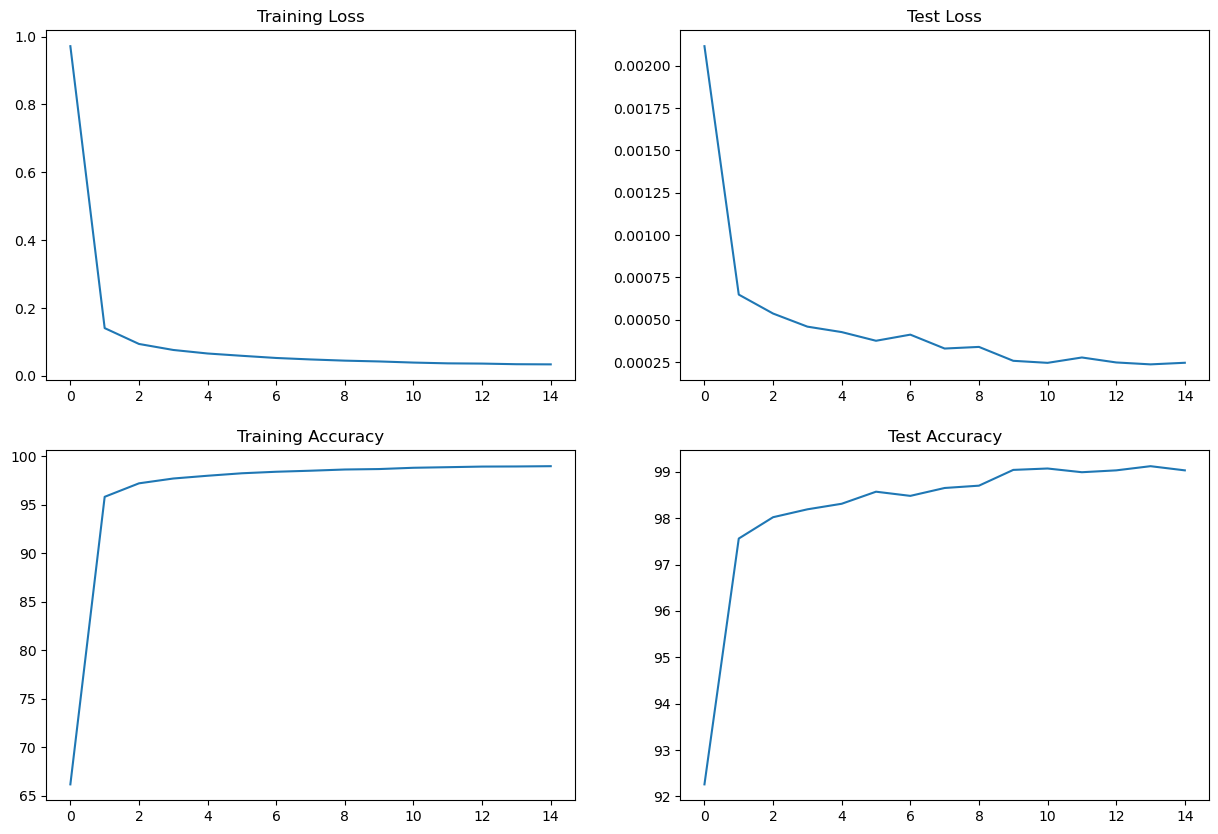

In [5]:
plt_fig(train_losses,train_acc,test_losses,test_acc)